# Red con \\(N\gg1\\) grados de libertad

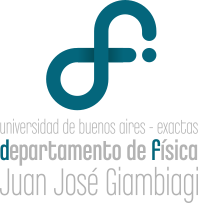  

©2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

## Enunciado
\\(N\\) partículas de masa \\(m\\) están equiespaciadas en una distancia \\(a\\).
Están sujetas a paredes mediante resortes de coeficiente de dureza \\(k\\) y longitud natural \\(l_0\\).
A su vez, en la dirección en que pueden desplazarse, están vinculadas por resortes con el mismo \\(k\\) pero de longitud natural \\(a > l_0\\).  
![](figuras/g-008.png)
1. Escriba la ecuación de movimiento para la partícula énésima.
	Indique todas las aproximaciones que realiza.
1. Proponga una solución adecuada y halle la relación de dispersión.
	¿Cuál es la frecuencia más baja posible?
1. Imponga las condiciones de contorno apropiadas para el sistema y calcule las frecuencias propias del mismo.
	Escriba la solución para el movimiento de cada partícula.
1. (*) Particularice para el caso \\(N = 2\\) y compare con el resultado que obtiene resolviendo el problema ``matricialmente''.
	Esquematice los modos normales de oscilación.

## 1. Ecuación de movimiento para partícula \\(n\\)

### Potencial asociado a la partícula \\(n\\)

In [1]:
import sympy as sym
from sympy.physics import mechanics as mech
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [2]:
t = sym.Symbol('t')
m, k, a, l_0 = sym.symbols('m, k, a, l_0', positive=True) # parámetros físicos

psi_nMinus = sym.Function('\Psi_{n-1}')(t)
psi_n = sym.Function('\psi_{n}')(t)
psi_nPlus = sym.Function('\psi_{n+1}')(t)

Las longitudes de los resortes son

In [3]:
l_superior = sym.Eq(sym.Symbol('l_\mathrm{superior}'), sym.sqrt(a**2 + psi_n**2) )
l_inferior = sym.Eq(sym.Symbol('l_\mathrm{inferior}'), sym.sqrt(a**2 + psi_n**2) )
l_izquierdo = sym.Eq(sym.Symbol('l_\mathrm{izquierdo}'), a + psi_n - psi_nMinus )
l_derecho = sym.Eq(sym.Symbol('l_\mathrm{derecho}'), a + psi_nPlus - psi_n )

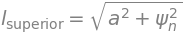

In [4]:
l_superior

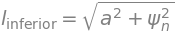

In [5]:
l_inferior

In [6]:
l_izquierdo

In [7]:
l_derecho

#### Resortes verticales y horizontales por separado

Para hacer las cosas más claras escribo el potencial de los resortes dispuestos verticalmente y horizontalmente por separado.
Comienzo con los verticales.

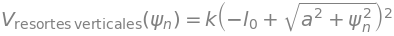

In [8]:
V_verticales = sym.Eq(sym.Function('V_\mathrm{resortes\,verticales}')(psi_n),
           k/2* (
               (l_superior.rhs - l_0 )**2 + (l_inferior.rhs - l_0 )**2
           ) 
          )
V_verticales

Ante un corrimiento **horizontal**, en \\(\hat{x}\\), desde la posición de equilibrio de la masa \\(n\\), \\(\psi_n\\), estos resortes orientados en sentido **vertical** ejercen en \\(\hat{x}\\) una

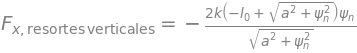

In [9]:
sym.Eq(sym.Symbol('F_{x, \mathrm{resortes\,verticales}}'), -V_verticales.rhs.diff(psi_n)  )

Si solo existieran estos resortes la dinámica estaría determinada por la 2.a ley de Newton

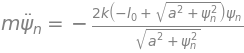

In [10]:
psi_n_2a_verticales = sym.Eq(m* psi_n.diff(t,2), -V_verticales.rhs.diff(psi_n) )
psi_n_2a_verticales

No tengo herramientas analíticas para resolver una ecuación diferencial no lineal (hay \\(\psi_n^2\\) involucrados).
Para resolverla la linealizo.
Hago esto con un desarrollo en serie en torno a la posición de equilibrio.

In [11]:
def maclaurin1erOrden(segundaLey):
    '''
    Desarrollo en serie de Taylor en torno al origen, o serie de Maclaurin, a primer orden en todas las variables.
    '''
    variables_set = segundaLey.atoms(sym.Function) # regresa un conjunto (set) de las funciones en la expresión  
    origenes = {variable : 0 for variable in variables_set} # diccionario de substituciones de cada variable por '0'
    segundaLey_rhs_1erOrden = segundaLey.rhs.subs(origenes) # Debe ser nula, sirve para verificar
    for variable in variables_set: 
        segundaLey_rhs_1erOrden += segundaLey.rhs.diff(variable).subs(origenes)* variable
    segundaLey_rhs_1erOrden = segundaLey_rhs_1erOrden.collect(variables_set) # collect agrupa lo que multiplica a su argumento
    return sym.Eq(segundaLey.lhs, segundaLey_rhs_1erOrden)

In [12]:
psi_n_2a1erOrden_verticales = maclaurin1erOrden(psi_n_2a_verticales)
psi_n_2a1erOrden_verticales

Otro tanto debo hacer con los resorten dispuestos **horizontalmente**

In [13]:
V_horizontales = sym.Eq(sym.Function('V_\mathrm{resortes\,horizontales}')(psi_n),
           k/2* (
               (l_izquierdo.rhs - a)**2 + (l_derecho.rhs - a)**2
           ) 
          )
V_horizontales

In [14]:
psi_n_2a_horizontales = sym.Eq(m* psi_n.diff(t,2), -V_horizontales.rhs.diff(psi_n) )
psi_n_2a_horizontales

No hubo necesidad de linealizar nada aquí por lo que la 2.a ley contemplando todos los resortes es

In [15]:
psi_n_2a1erOrden_separados = sym.Eq(m* psi_n.diff(t,2), psi_n_2a1erOrden_verticales.rhs + psi_n_2a_horizontales.rhs)
psi_n_2a1erOrden_separados

Que puede simplificarse en

In [16]:
psi_n_2a1erOrden_separados = sym.Eq(m* psi_n.diff(t,2), 
                                    (psi_n_2a1erOrden_verticales.rhs + psi_n_2a_horizontales.rhs).expand().collect(psi_n)
                                   )
psi_n_2a1erOrden_separados

#### Único potencial

Realmente no hay necesidad de separar por orientación los aportes al potencial.
De hecho pienso que además de poder traer confusión es sin duda más laborioso.

Resuelvo ahora partiendo del término del potencial del sistema que atañe a las fuerzas actuando sobre la partícula \\(n\\).

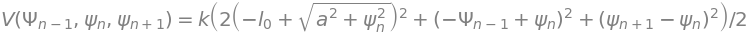

In [17]:
V = sym.Eq(sym.Function('V')(psi_nMinus, psi_n, psi_nPlus),
           k/2* (
               (l_izquierdo.rhs - a)**2 + (l_derecho.rhs - a)**2 +
               (l_superior.rhs - l_0 )**2 + (l_inferior.rhs - l_0 )**2
           ) 
          )
V

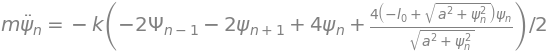

In [18]:
psi_n_2aNewton = sym.Eq(m* psi_n.diff(t,2), -V.rhs.diff(psi_n) )
psi_n_2aNewton

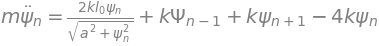

In [19]:
psi_n_2aNewton = psi_n_2aNewton.simplify()
psi_n_2aNewton

Como discutí previamente, debo linealizar esta 2.a ley de Newton para desplazamientos desde la posición de equilibiro de la masa \\(n\\) en \\(\hat{x}\\).

In [20]:
psi_n_2aNewton1erOrden = maclaurin1erOrden(psi_n_2aNewton)
psi_n_2aNewton1erOrden

Obteniendo idéntico resultado.

## 2. Relación de dispersión

### Propuesta de solución
Podemos probar con una solución como la del enunciado del problema anterior donde la parte espacial

In [21]:
A_p, n, k_p, alpha_p = sym.symbols(r'A^{(p)}, n, k^{(p)}, \alpha^{(p)}')
A_p_n = sym.Eq(sym.Symbol('A_n^{(p)}'), A_p* sym.cos(n* k_p* a + alpha_p ) )
A_p_n

está modulada por otra dependiente del tiempo para dar una expresión

In [22]:
omega_p, phi_p = sym.symbols(r'\omega^{(p)}, \phi^{(p)}')
psi_p_n = sym.Eq(sym.Function('\psi_n^{(p)}')(t) , A_p_n.lhs* sym.cos(omega_p * t + phi_p ) )
psi_p_n

In [23]:
psi_p_n_completo = psi_p_n.subs(A_p_n.lhs, A_p_n.rhs)
psi_p_n_completo

### Reemplazando en la 2.a ley de Newton

In [24]:
A_p_nPlus = sym.Eq(sym.Symbol('A_{n+1}^{(p)}'), A_p_n.rhs.subs(n, n + 1) )
A_p_nMinus = sym.Eq(sym.Symbol('A_{n-1}^{(p)}'), A_p_n.rhs.subs(n, n - 1) )
psi_p_nPlus = sym.Eq(sym.Symbol('\psi_{n+1}^{(p)}'), A_p_nPlus.lhs* sym.cos(omega_p * t + phi_p ) )
psi_p_nMinus = sym.Eq(sym.Symbol('\psi_{n-1}^{(p)}'), A_p_nMinus.lhs* sym.cos(omega_p * t + phi_p ) )
newton_substituciones={
    psi_n: psi_p_n.rhs,
    psi_nMinus: psi_p_nMinus.rhs,
    psi_nPlus: psi_p_nPlus.rhs,
}
newton_substituido = psi_n_2aNewton1erOrden.subs(newton_substituciones).expand()
newton_substituido

    2                                                                         
   ∂                                                                          
m⋅───(A_n__{(p)}⋅cos(\omega__{(p)}⋅t + \phi__{(p)})) = -4⋅A_n__{(p)}⋅k⋅cos(\om
    2                                                                         
  ∂t                                                                          

                                                                              
                              2⋅A_n__{(p)}⋅k⋅l₀⋅cos(\omega__{(p)}⋅t + \phi__{(
ega__{(p)}⋅t + \phi__{(p)}) + ────────────────────────────────────────────────
                                                       a                      
                                                                              

                                                                              
p)})                                                                          
──── + A_{n+1}__{(p)}⋅k⋅cos(\omega__{(p)}⋅t + \phi

In [25]:
omega_0 = sym.Symbol('\omega_0')
newton_substituido2 = sym.Eq(newton_substituido.lhs/m,
                            newton_substituido.rhs.subs(k, omega_0**2)
                           )
newton_substituido2

  2                                                                           
 ∂                                                                         2  
───(A_n__{(p)}⋅cos(\omega__{(p)}⋅t + \phi__{(p)})) = - 4⋅A_n__{(p)}⋅\omega₀ ⋅c
  2                                                                           
∂t                                                                            

                                                        2                     
                                    2⋅A_n__{(p)}⋅\omega₀ ⋅l₀⋅cos(\omega__{(p)}
os(\omega__{(p)}⋅t + \phi__{(p)}) + ──────────────────────────────────────────
                                                                 a            
                                                                              

                                                                              
⋅t + \phi__{(p)})                         2                                   
───────────────── + A_{n+1}__{(p)}⋅\omega₀ ⋅cos(\o

Quitando de ambos lados de la igualdad la dependencia temporal

In [26]:
psi_p_n.rhs/A_p_n.lhs

se llega a

In [27]:
cos_omega_t = psi_p_n.rhs/A_p_n.lhs
amplitudes = [A_p_nMinus.lhs, A_p_n.lhs, A_p_nPlus.lhs]
newton_substituido3 = sym.Eq( (newton_substituido2.lhs/ cos_omega_t).simplify(),
                             (newton_substituido2.rhs/ cos_omega_t).simplify().expand().collect(amplitudes)
                            )
newton_substituido3

De aquí puede despejarse una **relación recursiva de amplitudes**

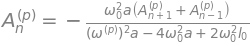

In [28]:
newton_substituido4 = sym.Eq(A_p_n.lhs, sym.solve(newton_substituido3, A_p_n.lhs)[0].collect(amplitudes) )
newton_substituido4

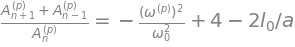

In [29]:
relaciónAmplitudes = sym.Eq( newton_substituido4.rhs.args[4]/newton_substituido4.lhs,
                            -1* ( newton_substituido4.rhs.args[3]**(-1)/ (newton_substituido4.rhs.args[1]* newton_substituido4.rhs.args[2]  )
                           ).expand()
                           )
relaciónAmplitudes

A la derecha de la igualdad en un cada modo \\(p\\) las \\(\omega\\) son constantes sin dependencia con \\(n\\).
Por tanto la relación de amplitudes a la izquierda se cumple en las \\(N\\) partículas.
Con tres parámetros, \\(\omega^{(p)}\\) y dos \\(A^{(p)}\\) de partículas adyacentes, se pueden obtener las \\(A^{(p)}\\) de todas las demás.

Volvemos a expresar la función de las \\(A_n^{(p)}\\)

In [30]:
A_p_n

reemplazando en las tres expresiones con el \\(n\\) correspondiente

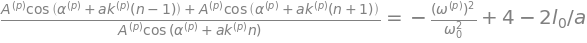

In [31]:
relaciónDispersión1 = relaciónAmplitudes.subs([(A_p_n.lhs, A_p_n.rhs ),
                                               (A_p_nPlus.lhs, A_p_nPlus.rhs ),
                                               (A_p_nMinus.lhs, A_p_nMinus.rhs ),
                                              ] )
relaciónDispersión1

Usando en el numerador la identidad trigonométrica
$$
    \cos(a \pm b) = \cos(a) \cos(b) \mp \sin(a) \sin(b)
$$
con el argumento \\(b= k^{(p)} a\\) se obtiene

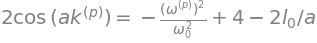

In [32]:
relaciónDispersión2 = relaciónDispersión1.subs(relaciónDispersión1.lhs.args[2],
                                               relaciónDispersión1.lhs.args[2].trigsimp() 
                                              )
relaciónDispersión2

Despejo \\(\left(\omega^{(p)} \right)^2\\)

In [33]:
relaciónDispersión3 = sym.Eq(omega_p**2,  sym.solve(relaciónDispersión2, omega_p**2)[0] )
relaciónDispersión3

Que con la identidad trigonométrica 
$$
    1- \cos{x} = 2 \sin^2 \left( \frac{x}{2} \right)
$$
puede re-escribirse como

In [34]:
relaciónDispersión4 = relaciónDispersión3.subs(relaciónDispersión3.rhs.args[3].args[1].args[1], 1+ 2* sym.sin(a* k_p/ 2)**2 )
relaciónDispersión4

In [35]:
relaciónDispersión5 = sym.Eq(relaciónDispersión4.lhs, relaciónDispersión4.rhs.expand().collect(omega_0) )
relaciónDispersión5

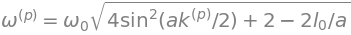

In [36]:
relaciónDispersión6 = sym.Eq(omega_p, omega_0* sym.sqrt(relaciónDispersión5.rhs.args[1] ) )
relaciónDispersión6

Para responnder cuál es la frecuencia más baja posible habría que obtener una expresión para el número de onda \\(k^{(p)}\\).
Pero uno podría ser astuto y recordar que el modo de frecuencia más baja es aquel en que todas las partículas del sistema se mueven al unisono, es decir con un $\lambda \rightarrow \infty$ o lo que es lo mismo un $k^{(p)} = 0$.
En tal caso la frecuencia más baja posible es

In [37]:
relaciónDispersión6.subs(k_p, 0)

Que obviamente no es nula como en un sistema completamente libre pues los resortes verticales mantienen aferradas a todas las \\(N\\) partículas oscilando al unisono en este modo.

## 3. Determinando \\(k^{(p)}\\) con condiciones de contorno

Si tal solución propuesta debe ser válida para toda \\(1\leq n\leq N\\) estoy forzado a imaginar que desde \\(n=1\\) se extiende a izquierda un resorte a \\(n= 0\\) y a derecha de \\(n= N\\) uno hasta \\(N= n+1\\).

Pero si mantengo \\(\psi_{n=0}= 0\\) como en el problema anterior, en que pensaba que \\(n= 0\\) estaba fija a una pared, la fuerza del resorte que la enlaza con la \\(n= 1\\) no respondería al dibujo del actual sistema.

La solución pasa por establecer que \\(\psi_{n= 0}= \psi_{n= 1}\\).
Y lo mismo para \\(\psi_{n= N}= \psi_{n= N+1}\\).
Esto es lo que posibilitaría imaginar que estos extremos son "libres" pero manteniendo la validez de la solución propuesta para toda \\(1\leq n\leq N\\).

Analizo solo la parte espacial de la solución

In [38]:
A_p_n

### Condición sobre $n=1$

In [39]:
gauche= sym.Eq(A_p_n.rhs.subs(n,0), A_p_n.rhs.subs(n,1) )
gauche

¿Cuando los cosenos de estos argumentos son iguales sin necesariamente ser los argumentos iguales? 
El coseno tiene simetría en el eje de las abcisas \\( \implies cos(x) = \cos(2 \pi- x)\\)
$$
    \begin{aligned}
    \alpha^{(p)} &= 2 \pi -\alpha^{(p)} - a k^{(p)} + q 2 \pi \qquad (q \in \mathbb{Z}) \\
    2 \alpha^{(p)} &= - a k^{(p)} + (q-1) 2 \pi ,
    \end{aligned}
$$
donde agregamos la posibilidad de sumar o restar \\(q 2 \pi\\) a un argumento.

### Condición sobre $n=N$

En la derecha haremos lo mismo con la misma identidad.

In [40]:
N = sym.Symbol('N')
droit= sym.Eq(A_p_n.rhs.subs(n,N), A_p_n.rhs.subs(n, N+1) )
droit

$$
\begin{aligned}
N a k^{(p)} + \alpha^{(p)} &= 2 \pi - \alpha^{(p)} - N a k^{(p)} - a k^{(p)} + r 2 \pi \qquad (r \in \mathbb{Z}) \\
2 N a k^{(p)} + 2 \alpha^{(p)} &= - a k^{(p)} + (r+1) 2 \pi \\
\end{aligned}
$$

Si se reemplaza $2 \alpha^{(p)}$ por lo obtenido en la relación anterior
$$
\begin{aligned}
2 N a k^{(p)} + \left( - a k^{(p)} + (q- 1) 2 \pi \right) &= - a k^{(p)} + (r- 1) 2 \pi\\
2 N a k^{(p)} &= (r- q+ 2) 2 \pi\\
2 N a k^{(p)} &= p 2 \pi \qquad (0\leq p< N)\\
\end{aligned},
$$
aquí \\(p< N\\) porque si fuera \\(p=N\\) se está repitiendo un valor de \\(k^{(p)}\\).

Un sistema con ambos extremos libres puede desplazarse a velocidad constante sin oscilar.
A tal modo normal se le asocia una \\(\omega^{(p)} = 0\\) con $p= 0$.
A diferencia del caso con algún extremo fijo aquí \\(0\leq p< N\\), para dar cuenta que habiendo \\(N\\) grados de libertad, este es el número de posibles modos normales.

In [41]:
p = sym.Symbol('p')
k_p_libreLibre = sym.Eq(k_p, p* sym.pi/(N* a) )
k_p_libreLibre

### Frecuencias propias del sistema

Ahora con la expresión de \\(k^{(p)}) puedo escribir la expresión de la frecuencia

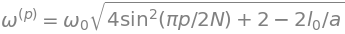

In [42]:
relaciónDispersión7 = relaciónDispersión6.subs(k_p_libreLibre.lhs, k_p_libreLibre.rhs)
relaciónDispersión7

### Solución para el movimiento de cada partícula

En

In [43]:
psi_p_n_completo

falta determinar \\(\alpha^{(p)}, A^{(p)}, \phi^{(p)}\\).
Los dos últimos se obtienen de condiciones iniciales del sistema, pero \\(\alpha^{(p)}\\) se determina de las condiciones de contorno.

De la condición sobre \\(n= 1\\) teníamos
$$
    \begin{aligned}
    2 \alpha^{(p)} &= - a k^{(p)} + (q-1) 2 \pi\\
    \alpha^{(p)} &= - \frac{a k^{(p)}}{2} + (q-1) \pi ,
    \end{aligned}
$$ 
podemos elegir el \\(\alpha^{(p)}\\) para \\(q-1 = 0\\)

In [44]:
alpha_p_libreLibre = sym.Eq(alpha_p, -(a/ 2)* k_p_libreLibre.rhs )
alpha_p_libreLibre

Entonces se arriba a que en cada modo \\(p\\) la oscilación longitudinal al sistema de la partícula \\(n\\) es

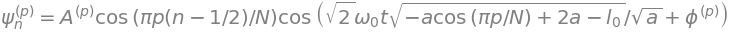

In [45]:
condiciones_libreLibre = {
    k_p_libreLibre.lhs : k_p_libreLibre.rhs,
    alpha_p_libreLibre.lhs : alpha_p_libreLibre.rhs,
    relaciónDispersión7.lhs : relaciónDispersión7.rhs,
}
psi_p_n_conTutti = psi_p_n_completo.subs(condiciones_libreLibre).simplify()
psi_p_n_conTutti

No hay que olvidar que su movimiento será dado por el conjunto de los modos normales

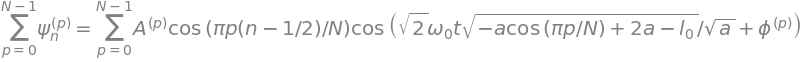

In [46]:
psi_n = sym.summation(psi_p_n_conTutti, (sym.Symbol('p'), 0, N-1) )
psi_n

## 4. Particularizando para \\(N= 2\\)

Con \\(N= 2\\) en este caso son posibles \\(p= 0,1\\)

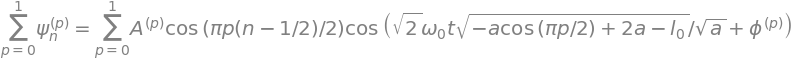

In [47]:
psi_n.subs(N,2)

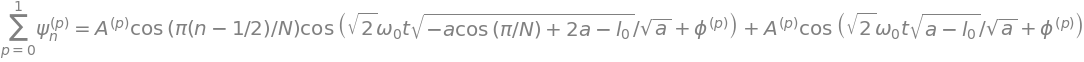

In [48]:
sym.Eq(psi_n.lhs.subs(N, 2), psi_p_n_conTutti.rhs.subs(p, 0) + psi_p_n_conTutti.rhs.subs(p, 1) )

Para el análisis de como son los modos normales con los \\(A_n^{(p)}\\) puede formarse el vector de amplitudes \\(\vec{A}^{(p)}\\).

In [49]:
A_p_n_libreLibre = A_p_n.subs(condiciones_libreLibre).simplify()
A_p_n_libreLibre

In [50]:
A_vector_p_libreLibre = sym.Eq(sym.Symbol(r'\vec{A}^{(p)}'),
                               sym.Matrix([
                                   A_p_n_libreLibre.rhs.subs([(n,1), (N,2) ] ),
                                   A_p_n_libreLibre.rhs.subs([(n,2), (N,2) ] ),
                               ] ),
                               evaluate = False
                              )
A_vector_p_libreLibre

                 ⎡             ⎛π⋅p⎞ ⎤
                 ⎢ A__{(p)}⋅cos⎜───⎟ ⎥
                 ⎢             ⎝ 4 ⎠ ⎥
\vec{A}__{(p)} = ⎢                   ⎥
                 ⎢            ⎛3⋅π⋅p⎞⎥
                 ⎢A__{(p)}⋅cos⎜─────⎟⎥
                 ⎣            ⎝  4  ⎠⎦

Si de este extraemos \\(A^{(p)}\\) tendremos los autovectores \\(\vec{\xi}^{(p)}\\), que podemos comparar con los que conocemos del análisis matricial.

In [51]:
xi_p_libreLibre = sym.Eq(sym.Symbol(r'\vec{\xi}^{(p)}'),
                               A_vector_p_libreLibre.rhs.subs(A_p, 1),
                         evaluate = False
                              )
xi_p_libreLibre

                   ⎡    ⎛π⋅p⎞ ⎤
                   ⎢ cos⎜───⎟ ⎥
                   ⎢    ⎝ 4 ⎠ ⎥
\vec{\xi}__{(p)} = ⎢          ⎥
                   ⎢   ⎛3⋅π⋅p⎞⎥
                   ⎢cos⎜─────⎟⎥
                   ⎣   ⎝  4  ⎠⎦

Para el modo \\(p=0\\) esperamos que todos tengan el mismo desplazamiento.

In [52]:
xi_p_libreLibre.rhs.subs(p,0)

⎡1⎤
⎢ ⎥
⎣1⎦

En el modo \\(p=1\\), el de menor frecuencia (energía), las partículas debieran desplazarse en contrafase.

In [53]:
xi_p_libreLibre.rhs.subs(p,1)

⎡ √2 ⎤
⎢ ── ⎥
⎢ 2  ⎥
⎢    ⎥
⎢-√2 ⎥
⎢────⎥
⎣ 2  ⎦